## Load Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# distributions
import scipy.integrate as integrate
from scipy.integrate import quad, quad_vec
from scipy.stats import invgamma
from scipy.stats import levy
from scipy.special import gamma, erfinv

import time
from datetime import datetime, timedelta

import sys
import importlib # ref: https://askubuntu.com/questions/144698/find-a-file-by-name-using-command-line
import seaborn as sns

import os

In [2]:
sys.path.append('../tools')
import tools

In [3]:
importlib.reload(tools)

<module 'tools' from '../tools/tools.py'>

## Download Data

In [4]:
df = pd.read_csv('data/apple_cleaned.csv')

In [5]:
# decide whether you use sample or not
sample = True

if sample:
    data = df[df['date']< '2017-01-30']
    
else:
    data = df.copy()

## Understanding Data

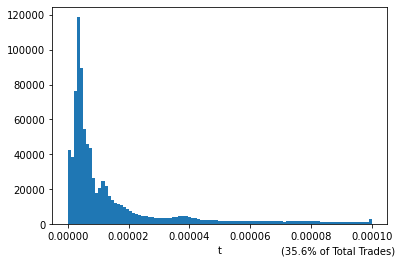

In [361]:
# Create the histogram with power scale bins on the x-axis
bins = np.linspace(0, 0.0001, 100)
n, bins, patches = plt.hist(data['delta_ts'], bins=bins)
plt.text(0.00007, - 17000,  "(35.6% of Total Trades)")
plt.xlabel('t')
#plt.legend()

plt.savefig('figures/frequency_near_0', facecolor='w')
plt.show()
plt.close()

In [10]:
#plt.figure(figsize=(12,6))
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

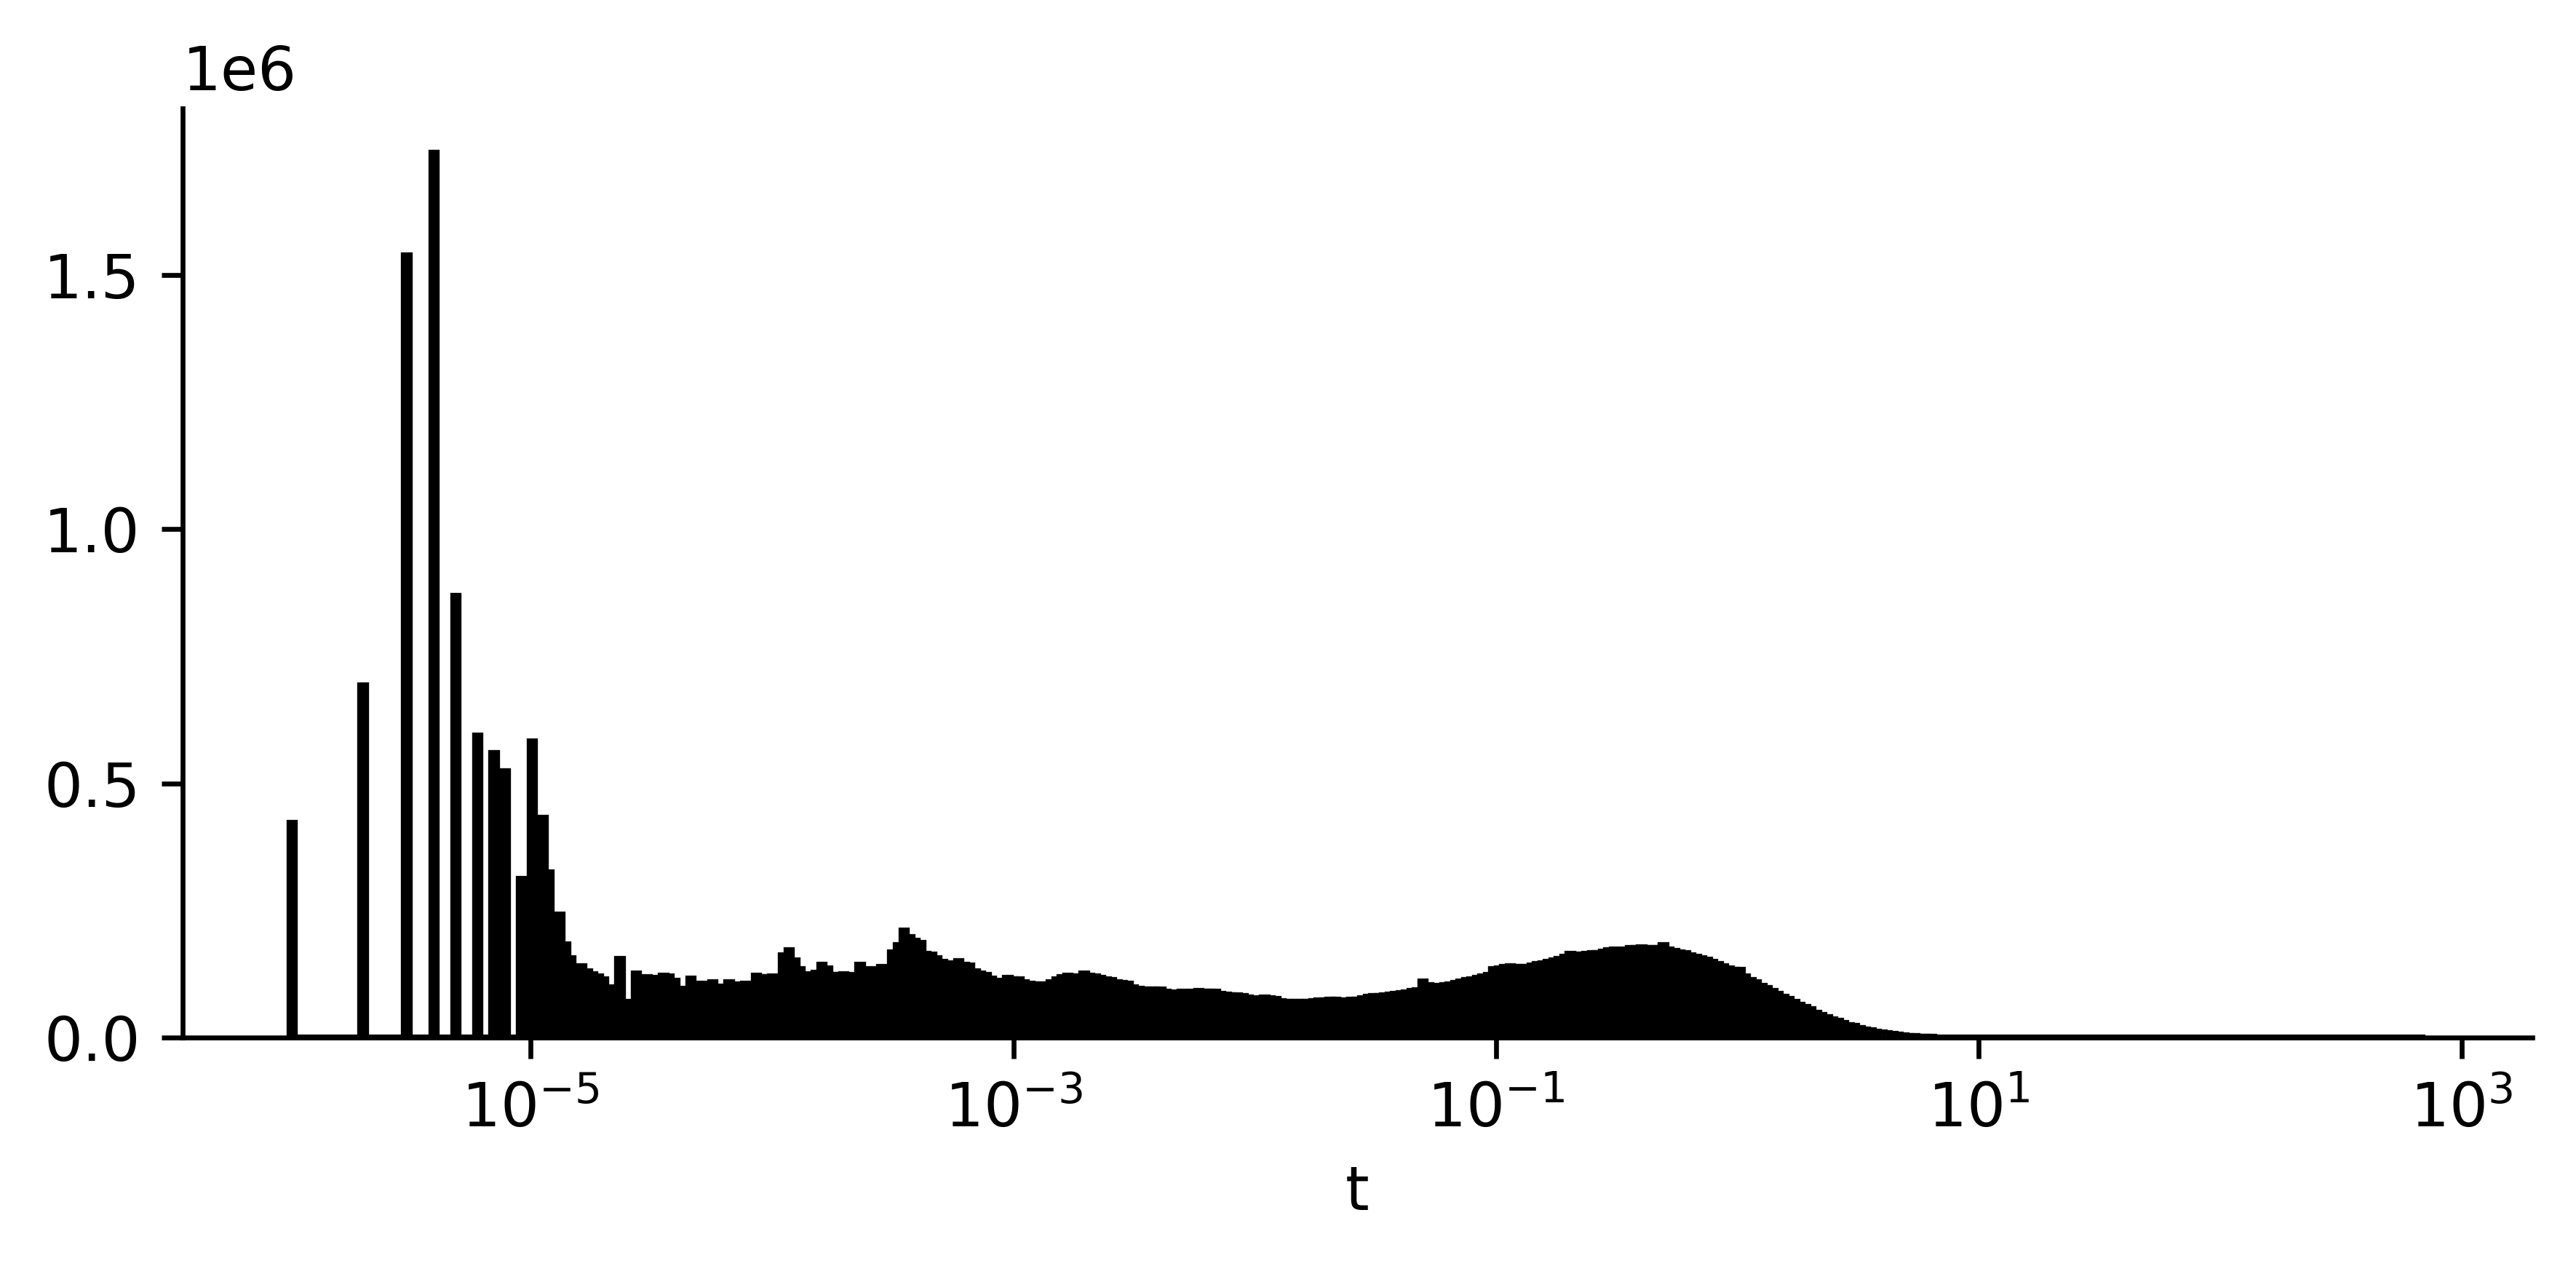

In [57]:


ax = sns.displot(data=data,
           x = 'delta_ts',
           kind = 'hist',
           log_scale=True,
           height = 3,
           aspect = 2)

ax.set_xlabels('t')
ax.set_ylabels('')
#plt.text(10, -320000, "(100.0% of Total Trades)")
plt.savefig('figures/frequency_logged', facecolor='w')
plt.show()
plt.close()

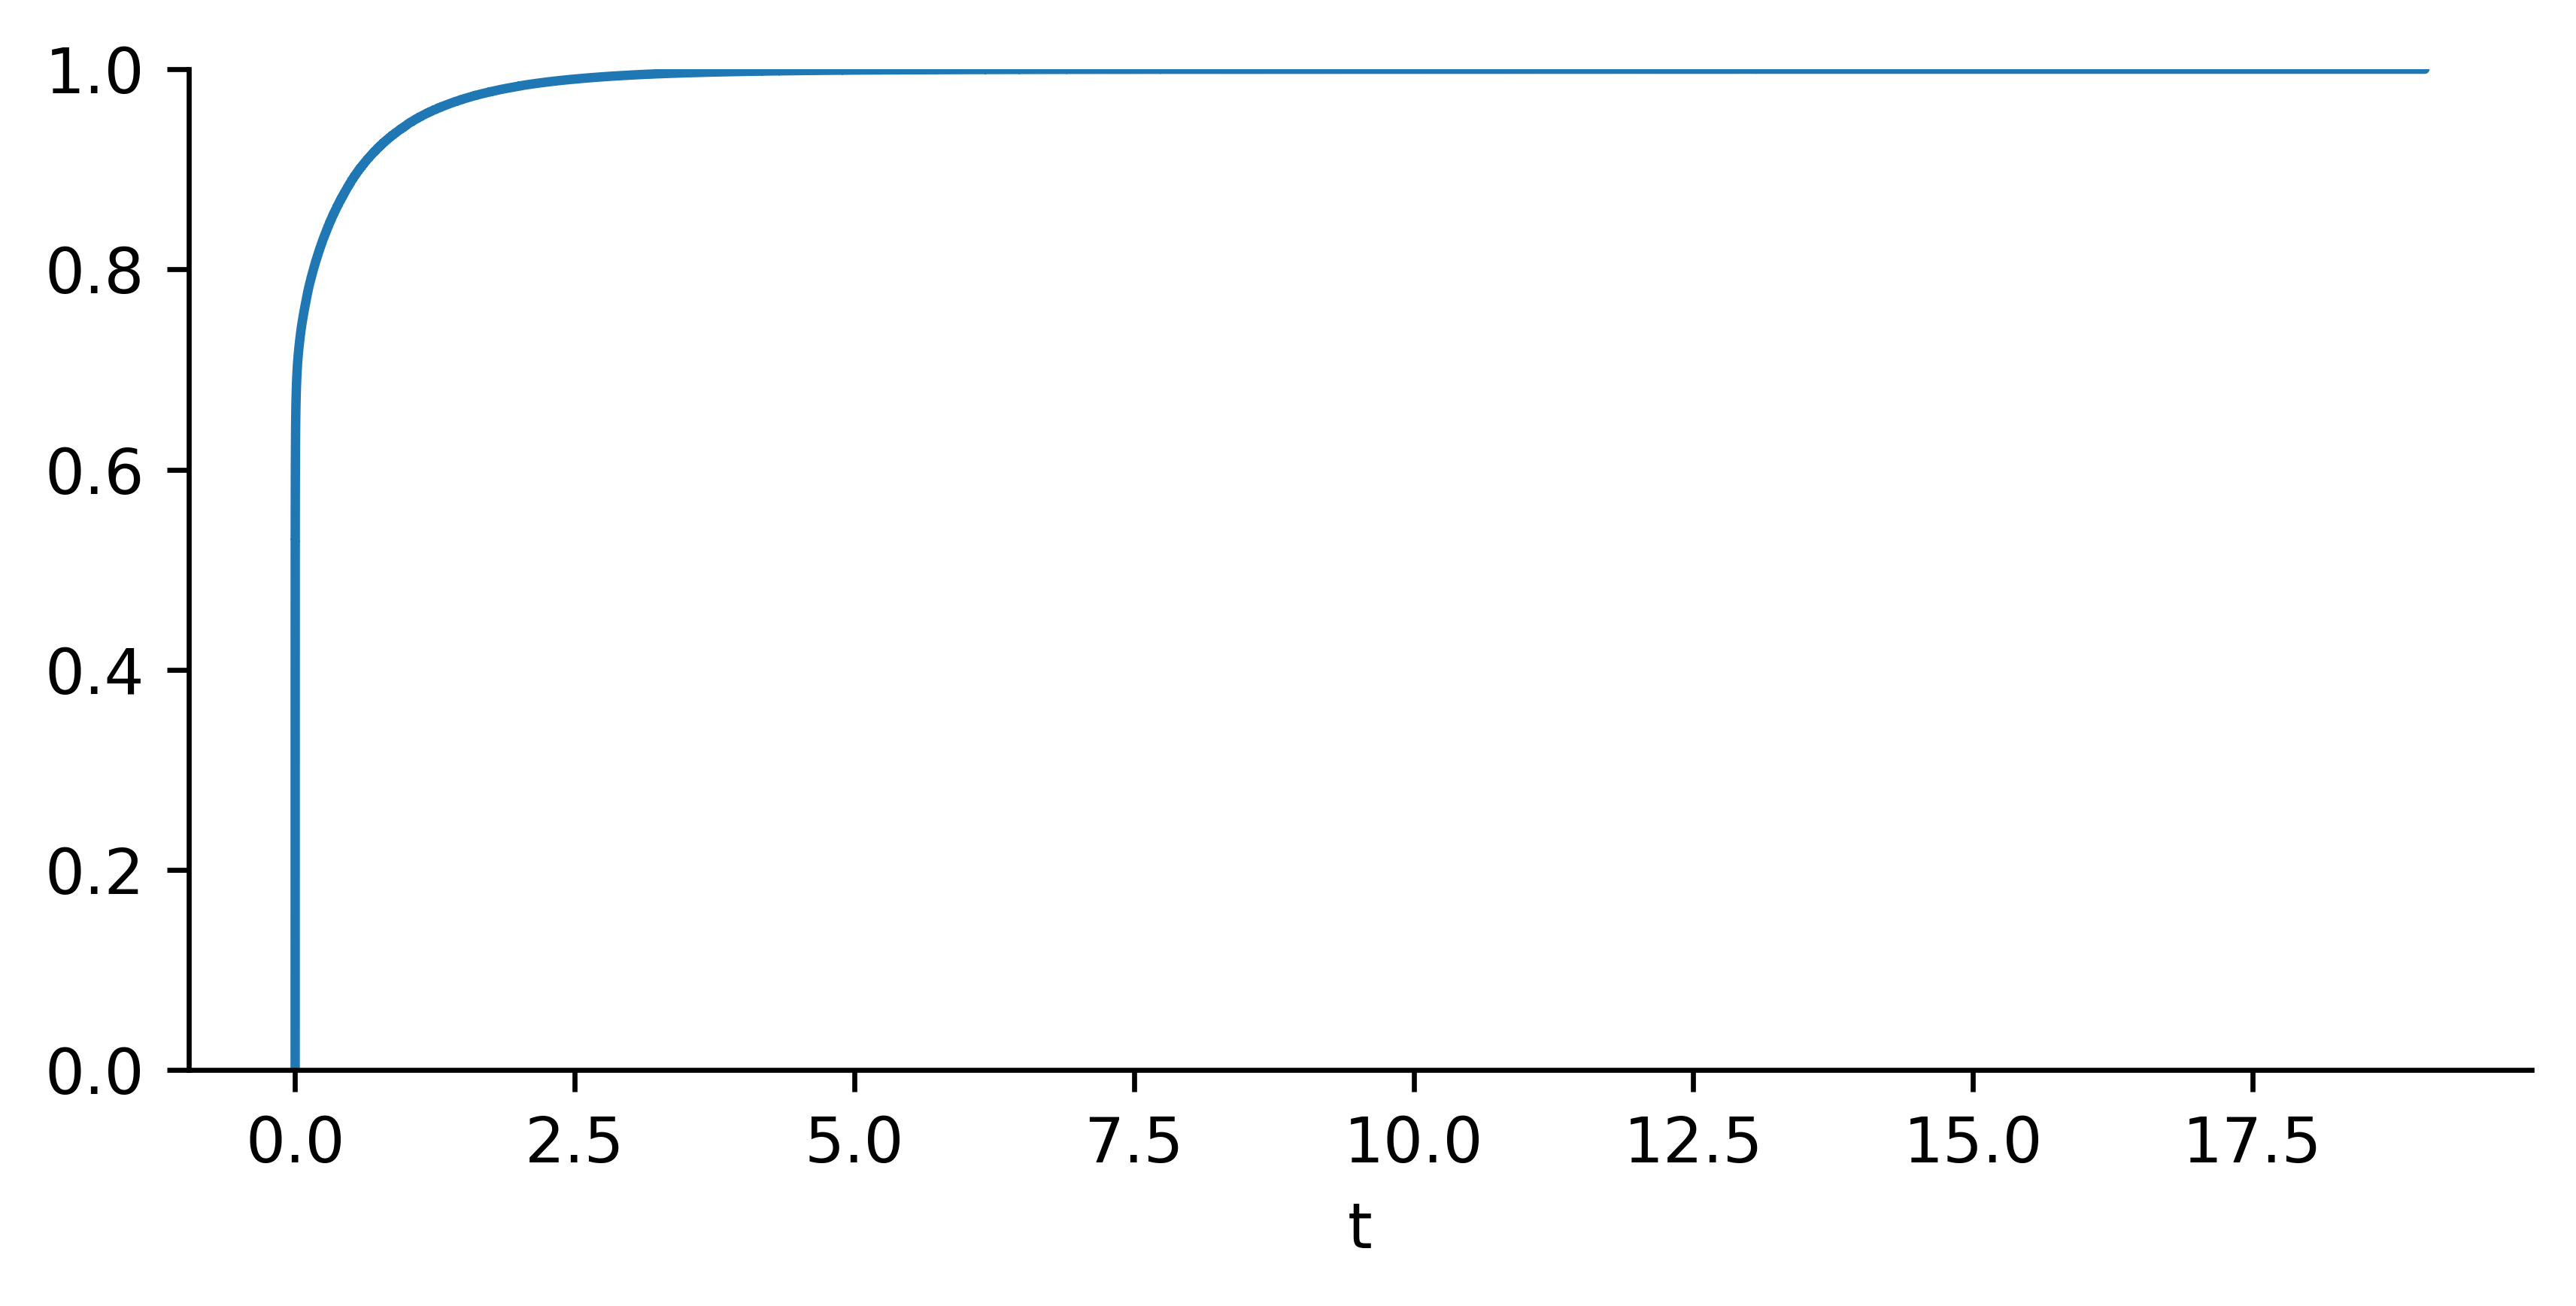

In [11]:
ax = sns.displot(data=data,
           x = 'delta_ts',
           kind = 'ecdf',
           log_scale=False,
           height = 3,
           aspect = 2)

ax.set_xlabels('t')
ax.set_ylabels('')
#plt.text(10, -320000, "(100.0% of Total Trades)")
#plt.savefig('figures/frequency_logged', facecolor='w')
plt.show()
plt.close()

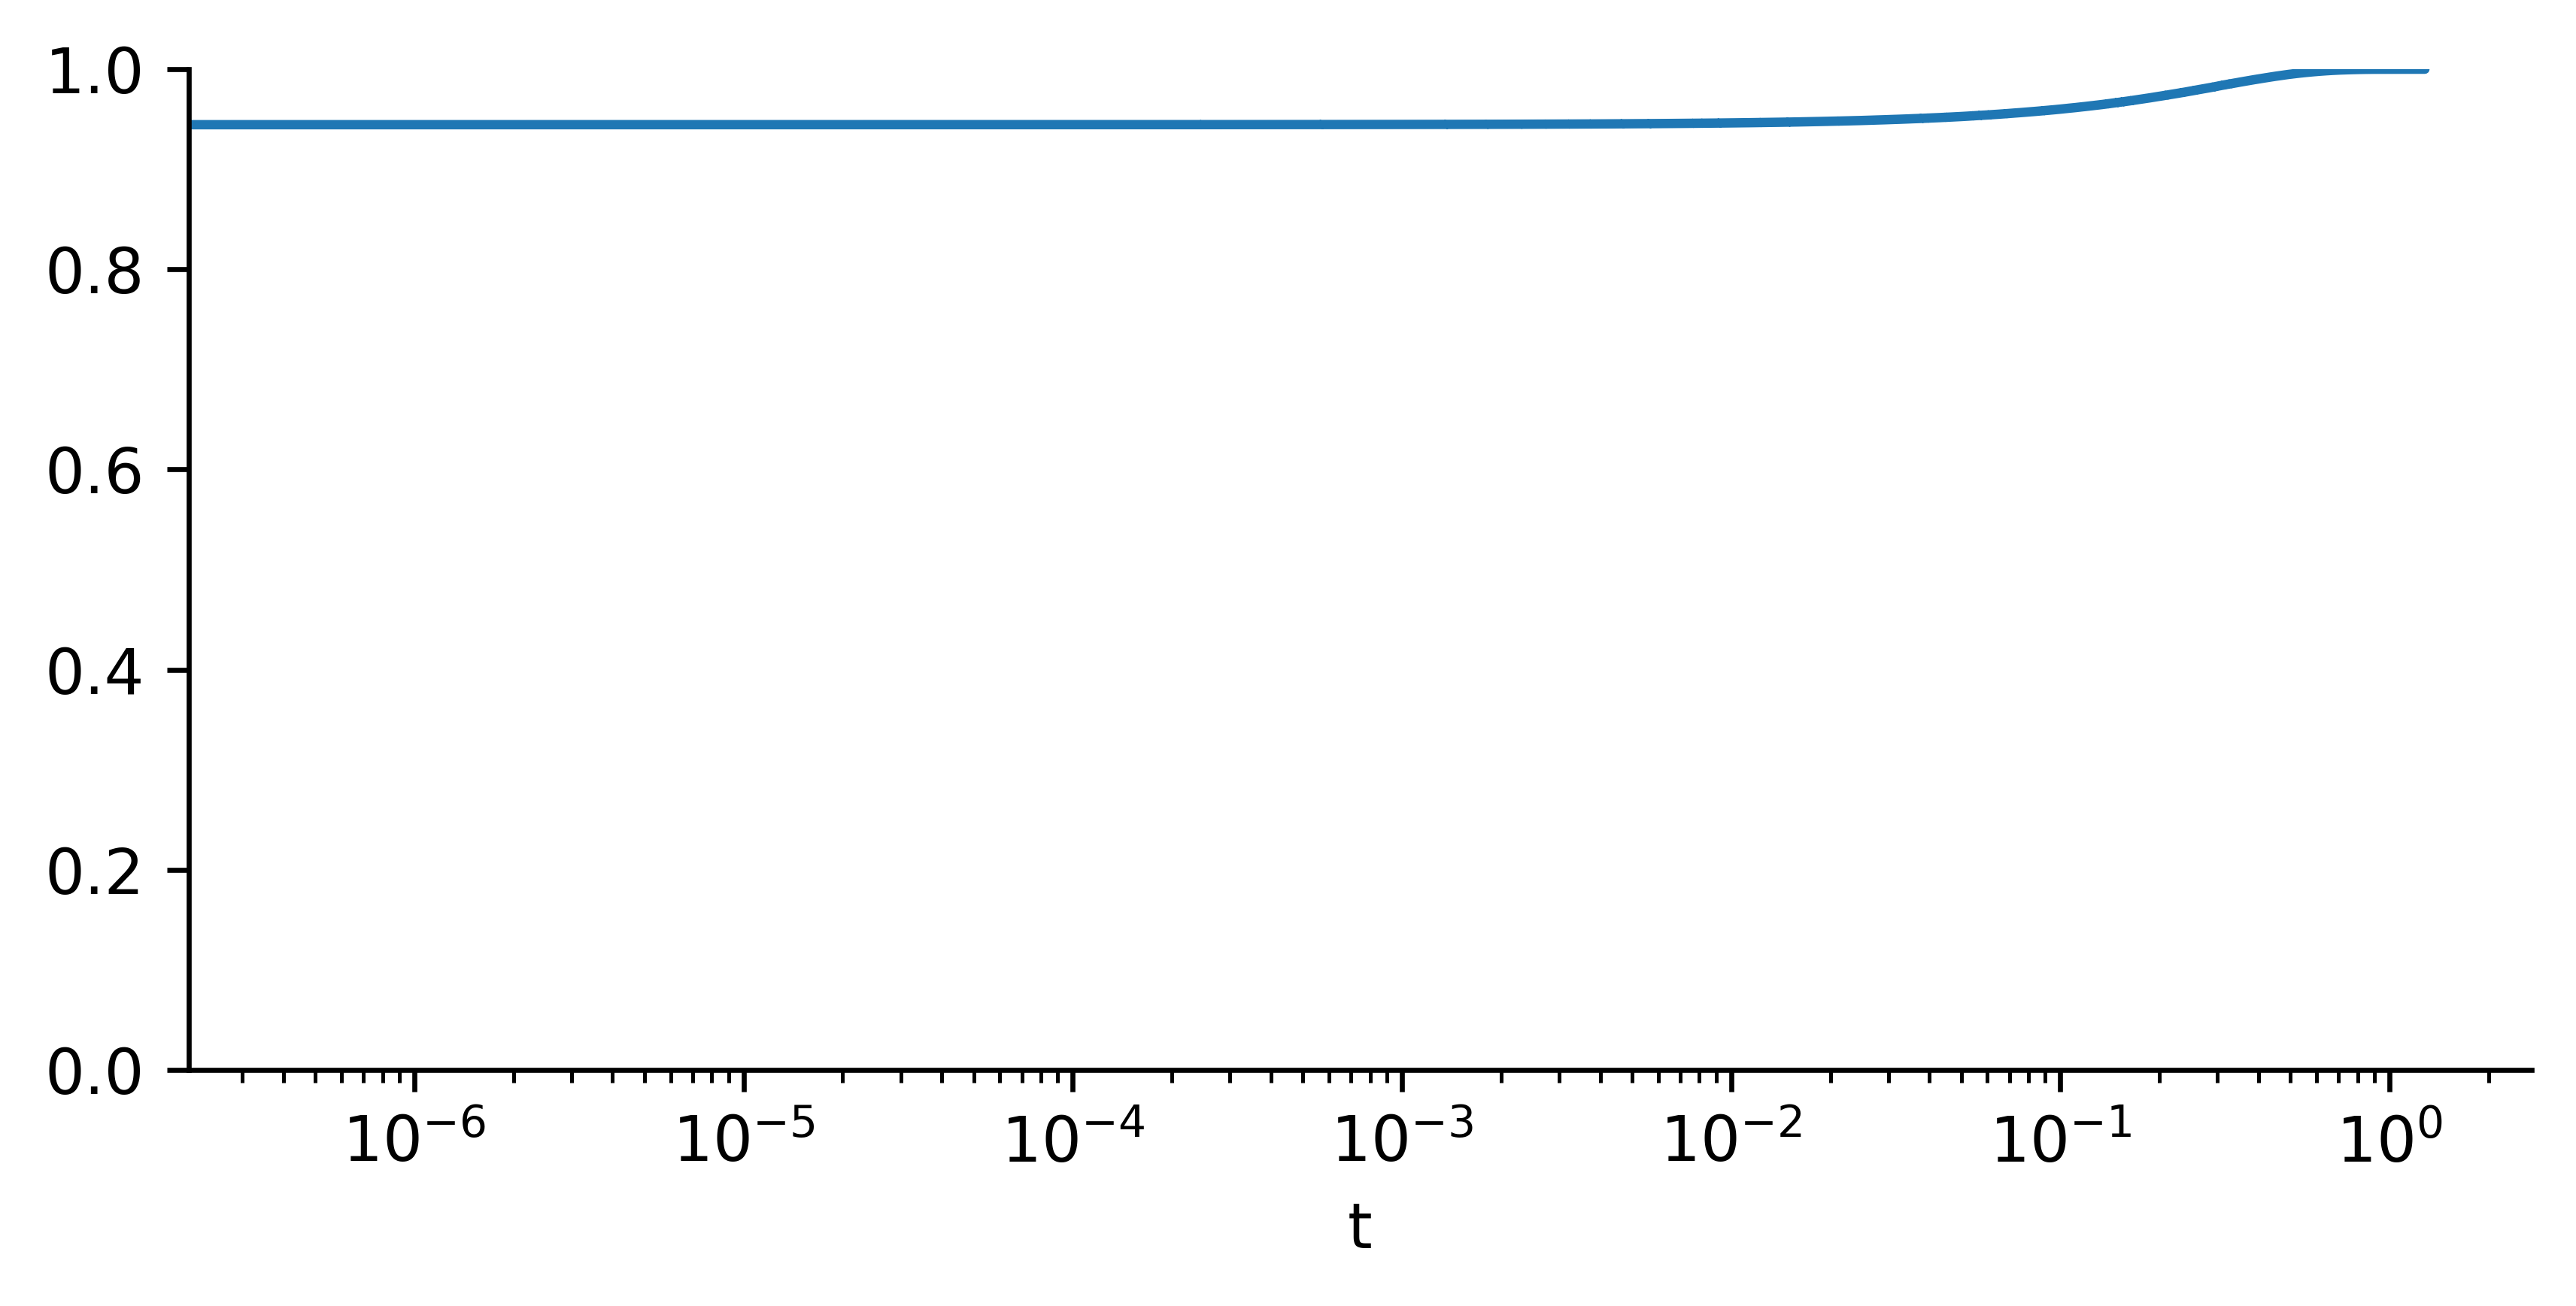

In [13]:
ax = sns.displot(data=data,
           x = 'delta_ts',
           kind = 'ecdf',
           log_scale=True,
           height = 3,
           aspect = 2)

ax.set_xlabels('t')
ax.set_ylabels('')
#plt.text(10, -320000, "(100.0% of Total Trades)")
#plt.savefig('figures/frequency_logged', facecolor='w')
plt.show()
plt.close()

## Summary Stats

In [6]:
summary_stats = ['n', np.nanmean, np.nanstd, np.nanmin, 0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, np.nanmax]
# Calculate summary statistics
duration_summary_stats = tools.estimation_summary(df['delta_ts'], summary_stats, rounding=10)


In [7]:
# Create a dataframe

summary = pd.DataFrame([duration_summary_stats],
                        columns=['n','Mean', 'Std', 'Min', '1.0%','5.0%', '25%', '50%', '75%','95.0%', '99%', 'Max'],
                      index=[''])

In [8]:
summary

,n,Mean,Std,Min,1.0%,5.0%,25%,50%,75%,95.0%,99%,Max
,36247425,0.162035,0.541388,0.000001,0.000001,0.000003,0.000015,0.000633,0.084742,0.938746,2.141777,708.527573


In [10]:
print(summary.to_latex(caption = 'Summary Statistics of Duration Data',
                        float_format="%.3f",
                        formatters = {'n': "{:.2E}".format,
                                      'Mean': "{:.2E}".format,
                                      'Std': "{:.2E}".format,
                                      'Min': "{:.2E}".format,
                                      '1.0%': "{:.2E}".format,
                                      '5.0%': "{:.2E}".format,
                                      '25.0%': "{:.2E}".format,
                                      '50.0%': "{:.2E}".format,
                                      '75.0%': "{:.2E}".format,
                                      '95.0%': "{:.2E}".format,
                                      '99.0%': "{:.2E}".format},
                        position = 'H',
                        #longtable = True,
                        escape=True,
                        #multirow=True
                      ))

\begin{table}[H]
\centering
\caption{Summary Statistics of Duration Data}
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &        n &     Mean &      Std &      Min &     1.0\% &     5.0\% &   25\% &   50\% &   75\% &    95.0\% &   99\% &     Max \\
\midrule
{} & 3.62E+07 & 1.62E-01 & 5.41E-01 & 1.00E-06 & 1.00E-06 & 3.00E-06 & 0.000 & 0.001 & 0.085 & 9.39E-01 & 2.142 & 708.528 \\
\bottomrule
\end{tabular}
\end{table}



<ipython-input-10-b771cbe1d991>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary.to_latex(caption = 'Summary Statistics of Duration Data',
